In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_8/'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_8


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')

In [6]:
def convertToRGB(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
test1 = cv2.imread('deo_kinh.jpg')
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

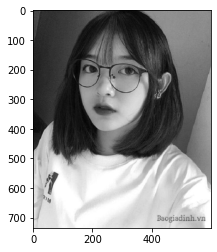

In [8]:
plt.imshow(gray_img, cmap = 'gray')

In [9]:
faces = face_cascade.detectMultiScale(gray_img,
                                      scaleFactor = 1.05,
                                      minNeighbors =20)

In [10]:
print('faces found: ', len(faces))

faces found:  1


In [11]:
for ( x, y, w, h) in faces:
  cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [12]:
eyes = eye_cascade.detectMultiScale(gray_img,
                                    scaleFactor = 1.05,
                                    minNeighbors =20)
for (ex,ey,ew,eh) in eyes:
  cv2.rectangle(test1,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

In [13]:
print('eyes found: ', len(eyes))

eyes found:  2


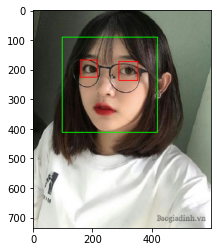

In [14]:
plt.imshow(convertToRGB(test1))

In [15]:
def detect_faces_eyes(f_cascade, e_cascade, colored_img, scaleFactor = 1.05):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY) 

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=20)   
    faces_found = len(faces)

    #go over list of bodys and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
    eyes = e_cascade.detectMultiScale(gray,scaleFactor=scaleFactor, minNeighbors=20)
    eyes_found = len(eyes)
    for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(img_copy,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
    return img_copy, faces_found, eyes_found

In [16]:
test2 = cv2.imread('deo_kinh.jpg')
faces_eyes_detected_img, faces_found, eyes_found = detect_faces_eyes(face_cascade, eye_cascade, test2)

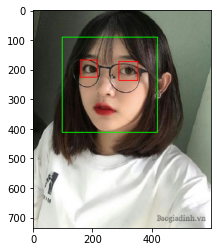

In [17]:
plt.imshow(convertToRGB(faces_eyes_detected_img))

In [18]:
print('Faces found: ', faces_found)
print('Eyes found: ', eyes_found)

Faces found:  1
Eyes found:  2
